<a href="https://colab.research.google.com/github/terinkov/DataAnalysis/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание на тему "Метод моментов и метод максимального правдоподобия"
(задача для разогрева)

Пусть случайная величина $ X $ распределена экспоненциально с параметром $ \lambda $, то есть $ X \sim \text{Exp}(\lambda) $, где $ \lambda > 0 $. Известно, что было получено $ n $ независимых наблюдений: $ X_1, X_2, \dots, X_n $.

## Задание 4 (1 балл)
Реализуйте метод моментов и метод максимального правдоподобия для оценки параметра $ \lambda $. Для демонстрации ипользуйте $n = 1000$ и значение $\lambda = 2$. Для генерации можно использовать random.exponential из numpy (обратите внимание на правильную подачу параметра!).

## Небольшая теоретическая справка

### 1. Метод моментов для оценки параметра $ \lambda $

Для экспоненциального распределения математическое ожидание:

$$
\mathbb{E}[X] = \frac{1}{\lambda}
$$

Используем выборочное среднее $ \overline{X} $ как оценку для $ \mathbb{E}[X] $:

$$
\hat{\lambda}_{\text{MM}} = \frac{1}{\overline{X}} = \frac{n}{\sum_{i=1}^{n} X_i}
$$

### 2. Метод максимального правдоподобия для оценки параметра $ \lambda $

Функция правдоподобия для экспоненциального распределения имеет вид:

$$
L(\lambda) = \prod_{i=1}^{n} \lambda \exp(-\lambda X_i)
$$

Логарифм функции правдоподобия:

$$
\ln L(\lambda) = n \ln \lambda - \lambda \sum_{i=1}^{n} X_i
$$

Для нахождения максимума, приравниваем первую производную логарифма функции правдоподобия к нулю:

$$
\frac{\partial}{\partial \lambda} \ln L(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} X_i = 0
$$

Решаем для $ \lambda $:

$$
\hat{\lambda}_{\text{ML}} = \frac{n}{\sum_{i=1}^{n} X_i}
$$

### Замечание:
Оценки по методу моментов и методу максимального правдоподобия для экспоненциального распределения совпадают.

### 3. Реализуйте оба метода на Python, используя сгенерированные данные.

Оценка методом моментов: 2.0565
Оценка методом максимального правдоподобия: 2.0565


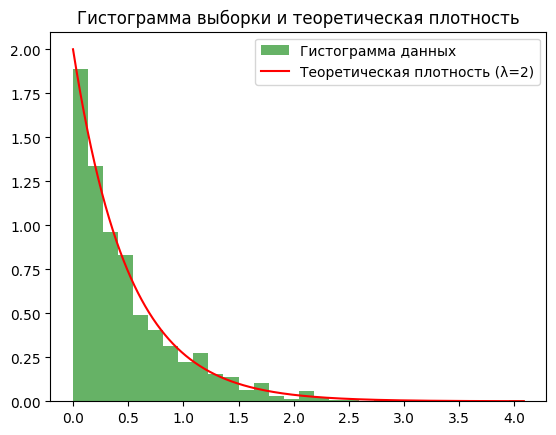

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# start your code

def mle_exponential(sample):
    lambda_hat_ml = 1 / np.mean(sample)
    return lambda_hat_ml

def method_of_moments_exponential(sample):
    lambda_hat_mm = 1 / np.mean(sample)
    return lambda_hat_mm

# Генерация выборки
np.random.seed(42)
n = 1000
true_lambda = 2
data = np.random.exponential(1/true_lambda, size=n)  # Генерация из Exp(lambda)

# Оценки
lambda_ml = mle_exponential(data)
lambda_mm = method_of_moments_exponential(data)

# end your code

# Вывод результатов
print(f"Оценка методом моментов: {lambda_mm:.4f}")
print(f"Оценка методом максимального правдоподобия: {lambda_ml:.4f}")

# График гистограммы данных и теоретической плотности
x = np.linspace(0, np.max(data), 1000)
pdf = true_lambda * np.exp(-true_lambda * x)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма данных')
plt.plot(x, pdf, 'r-', label=f'Теоретическая плотность (λ={true_lambda})')
plt.legend()
plt.title('Гистограмма выборки и теоретическая плотность')
plt.show()

# Задание на тему "Метод моментов и метод максимального правдоподобия"

## Описание задачи
Мы будем работать с датасетом **Bank Marketing Dataset**, который содержит информацию о клиентах банка и их реакции на маркетинговые предложения. В этом задании мы используем два метода: метод моментов (MM) и метод максимального правдоподобия (MLE), чтобы оценить параметры распределений, описывающих данные.

**Цель задания**:

0. Постройте статистическую модель эксперимента в парадигме пройденного материала.
1. Применить метод моментов для оценки параметров распределения для числовых переменных.
2. Использовать метод максимального правдоподобия для оценки параметров распределения.
3. Сравнить результаты оценок с реальными данными и сделать выводы.

## Задание 5 (5 баллов)
Вам предстоит на примере датасета **Bank Marketing Dataset** (файл bank-full.csv) применить полученные знания. Постройте оценки методами моментов и максимального правдоподобия для переменных `duration` и `age`. Распределения для `age` рекомендуется (настаиваем) взять нормальное $N(\mu, \sigma^2)$ с двумя неизместными параметрами $\mu$ и $\sigma^2$ (выбор иного распределения необходимо будет объяснить). Выбор распределения для `duration` остается за вами, но его необходимо будет пояснить.

### Шаги выполнения задания

#### 1. (0.5 балла) Загрузите данные и проведите первичный осмотр данных. Выведете:
1. тип данных,
2. сколько строк,
3. переменных,
4. сколько значений принимает переменная `job`, `education` и `poutcome`.

#### 2. (1.5 балла) Анализ переменной `age`.
1. (0.5) Постройте оценку ММ для неизвестных параметров распределения `age`,
2. (0.5) Постройте оценку ММП для неизвестных параметров распределения `age`,
3. (0.5) Сравните оценки.

#### 3. (3 балла) Анализ переменной `duration`
1. (1) Постройте статистическую модель.
1. (1) Постройте оценку ММ для неизвестных параметров распределения `duration`,
2. (1) Постройте оценку ММП для неизвестных параметров распределения `duration`,
3. (0 :)) Сравните оценки.

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Загрузите данные и проведите первичный осмотр данных. Выведете:
1. тип данных,
2. сколько строк,
3. переменных,
4. сколько значений принимает переменная `job`, `education` и `poutcome`.

In [ ]:
# from github
url = 'https://raw.githubusercontent.com/terinkov/sorces/refs/heads/main/bank-full.csv'

In [ ]:
data = pd.read_csv(url, sep=';')



# Тип данных
print(f"Тип данных: \n{data.dtypes}")

# Количество строк и переменных
print(f"Количество строк: {data.shape[0]}")
print(f"Количество переменных: {data.shape[1]}")

# Уникальные значения переменных job, education и poutcome
print(f"Уникальные значения для переменной 'job': {data['job'].nunique()}")
print(f"Уникальные значения для переменной 'education': {data['education'].nunique()}")
print(f"Уникальные значения для переменной 'poutcome': {data['poutcome'].nunique()}")

data.describe()

Тип данных: 
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Количество строк: 45211
Количество переменных: 17
Уникальные значения для переменной 'job': 12
Уникальные значения для переменной 'education': 4
Уникальные значения для переменной 'poutcome': 4


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### 2. Анализ переменной `age`.
1. Постройте оценку ММ для неизвестных параметров распределения `age`,
2. Постройте оценку ММП для неизвестных параметров распределения `age`,
3. Сравните оценки.

Вывод метода максимального правдоподобия для Нормального распрделения:
https://www.matburo.ru/Examples/Files/ms_mmp_2.pdf

Вывод метода моментов для оценки параметров Нормального распределения (пример 4.2):
https://hmath.spbstu.ru/userfiles/files/documents/collection/4/methods.pdf

По обоим методам оценки совпадают, и равны соответственно

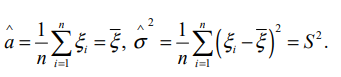

Метод моментов и метод максимального правдоподобия (оценки совпадают): 
(оценка мат ожидания) mu = 40.94, (оценка дисперсии) sigma^2 = 112.76


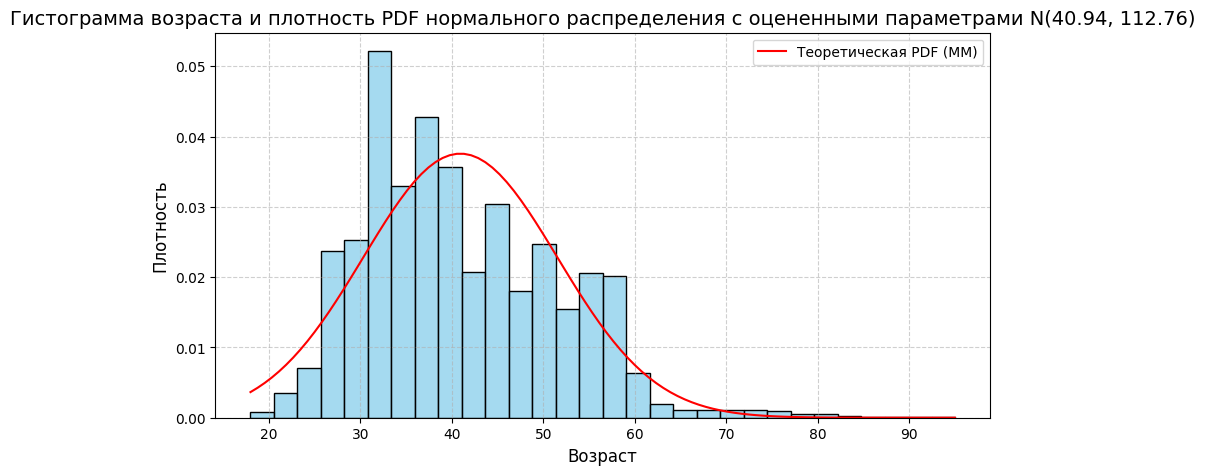

In [ ]:

from scipy.stats import norm
# Выбираем переменную age
ages = data['age']

# Метод моментов (ММ)
mu_mm = np.mean(ages)
sigma2_mm = np.var(ages, ddof=0)  # Метод моментов использует деление на n

# Метод максимального правдоподобия (ММП)
mu_mle = np.mean(ages)
sigma2_mle = np.var(ages, ddof=0)  # Для нормального распределения ММП оценка совпадает с ММ

sigma_mm = np.std(ages, ddof=0)

# Вывод результатов
print(f"Метод моментов и метод максимального правдоподобия (оценки совпадают): \n(оценка мат ожидания) mu = {mu_mm:.2f}, (оценка дисперсии) sigma^2 = {sigma2_mm:.2f}")

# 1. Гистограмма + подогнанная PDF
x_vals = np.linspace(min(ages), max(ages), 100)  # Создаем значения x для PDF
pdf_vals = norm.pdf(x_vals, mu_mm, sigma_mm)  # Теоретическая PDF

plt.figure(figsize=(10, 5))
sns.histplot(ages, bins=30, kde=False, color='skyblue', stat='density', edgecolor='black')
plt.plot(x_vals, pdf_vals, color='red', label="Теоретическая PDF (ММ)")

plt.title("Гистограмма возраста и плотность PDF нормального распределения с оцененными параметрами N({:.2f}, {:.2f})".format(mu_mle,sigma2_mm), fontsize=14)
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


#### 3. Анализ переменной `duration`
1. Постройте статистическую модель.
1. Постройте оценку ММ для неизвестных параметров распределения `duration`,
2. Постройте оценку ММП для неизвестных параметров распределения `duration`,
3. Сравните оценки.

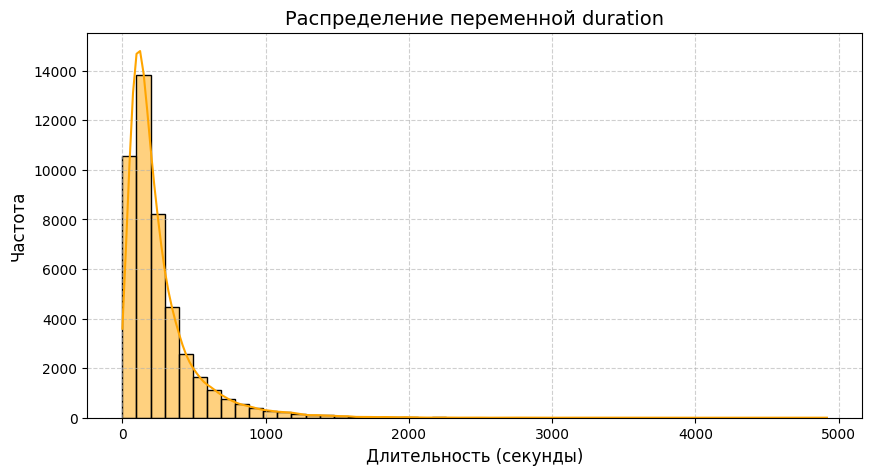

In [ ]:
# Выбираем переменную duration
duration = data['duration']

# Построение гистограммы
plt.figure(figsize=(10, 5))
sns.histplot(duration, bins=50, kde=True, color='orange', edgecolor='black')

# Настройки графика
plt.title("Распределение переменной duration", fontsize=14)
plt.xlabel("Длительность (секунды)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Показать график
plt.show()

Распределение параметра duration не симметричное, поэтому предположим, что duration по распределению совпадает с

a) Гамма-распределением

б) Экспоненциальным распределением

в) Логнормальным распределением

Оценим методом моментов параметры каждого из этих распределений, для выборки duration. Проверим по критерию Хи-квадрат гипотезу о том, что выборка duration имеет выбраное теоретическое распределение (проверим для каждого распределения). Итоговое распределение примем, согласно наибольшей значимости.

Parameters for Gamma distribution: (0.1630989324351367, 7.131671545777968, 25.59281225002351)


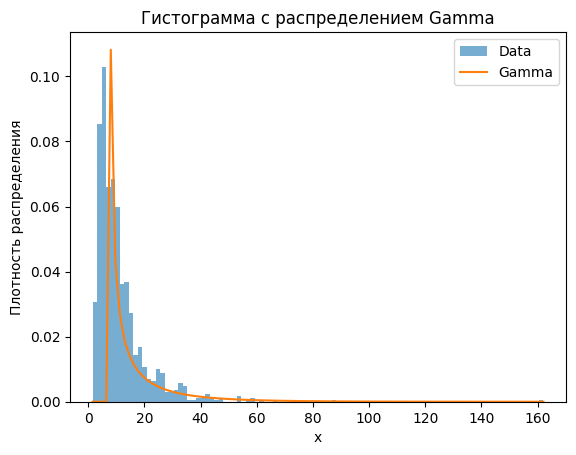

Parameters for Exponential distribution: (0.9700444478604595, 10.335787453909232)


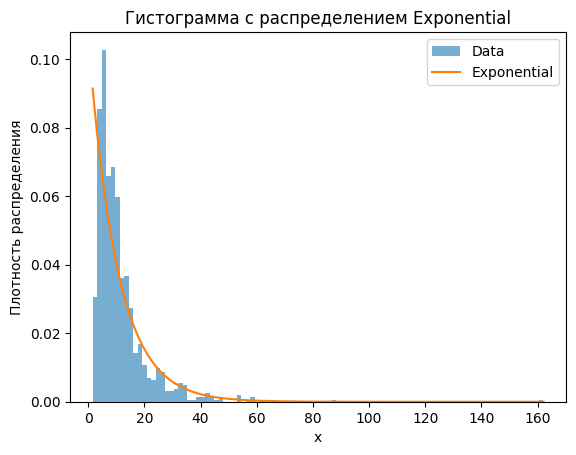

Parameters for Lognormal distribution: (0.9165123645007139, 2.297232508683352, 5.919084959130165)


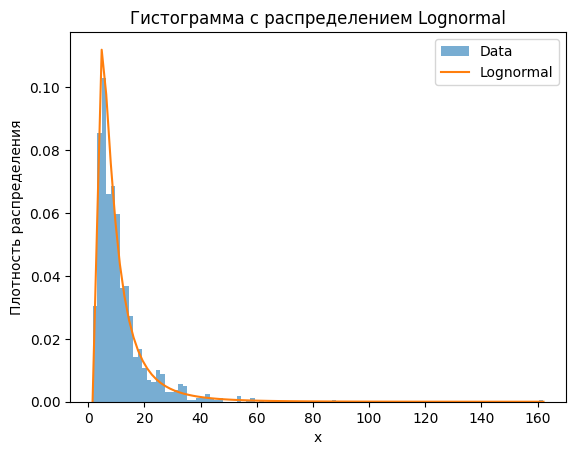

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

#distributions to test
distributions = [stats.gamma, stats.expon, stats.lognorm]
distribution_names = ['Gamma', 'Exponential', 'Lognormal']


#Fitting parameters and PDFs
params_list = []
pdf_list = []

x = np.linspace(duration.min(), duration.max(), 100)

for dist, name in zip(distributions, distribution_names):
    try:
        params = dist.fit(duration,method = 'MM') #Метод моментов
        pdf = dist.pdf(x, *params)

        params_list.append(params)
        pdf_list.append(pdf)

    except RuntimeError as e:
        print(f"Error fitting {name} distribution: {e}")
        params_list.append(None)
        pdf_list.append(None)


    #Plotting:
    plt.hist(duration, density=True, bins=100, alpha=0.6, label='Data')

    if pdf is not None:
        plt.plot(x, pdf, label=name)

    plt.xlabel('x')
    plt.ylabel('Плотность распределения')
    plt.title('Гистограмма с распределением '+ name)
    print(f"Parameters for {name} distribution: {params}")
    plt.legend()
    plt.show()



In [ ]:
def check_chisquare(data, dist, alpha=0.01, label='', interval_alpha=0.01, intervals=10):
    r = len(dist.args)
    L, R = dist.ppf(interval_alpha/2), dist.ppf(1-interval_alpha/2)
    bins = np.linspace(L, R, intervals+1)
    data_freq, _ = np.histogram(data, bins=bins)
    N = sum(data_freq)
    dist_freq = np.array([dist.cdf(bins[i+1]) - dist.cdf(bins[i]) for i in range(intervals)])
    Zi2 = lambda i:(data_freq[i] - N * dist_freq[i])**2 / (N * dist_freq[i] * (1 - dist_freq[i]))
    Z = sum(Zi2(i) for i in range(len(data_freq)))
    target_chi2 = stats.chi2(intervals-r-1)
    p = 1 - target_chi2.cdf(Z)
    Lz, Rz = map(float, target_chi2.interval(1-alpha))

    print(f'Гипотеза о согласии распределения данных с известным распределением ({label}) по критерию хи-2')
    print('Значимость:', p)
    print('Уровень значимости:', alpha)
    print('Статистика:', Z)
    print('Область допустимости:', [Lz, Rz])
    if alpha < p and Lz <= Z <= Rz:
        print('Вывод: Гипотезу не следует отвергать')
    else:
        print('Вывод: Гипотезу следует отвергать')

def get_dist_params(data):
    return [
        distributions[0].fit(data, method='MM'),
        distributions[1].fit(data, method='MM'),
        distributions[2].fit(data, method='MM')
    ]
def get_fit_dists(data):
    return [dist(*params) for dist, params in zip(distributions, get_dist_params(data))]
dists = get_fit_dists(duration)
for i in range(len(dists)):
    check_chisquare(duration, dists[i], label=distribution_names[i])
    print('\n')

Гипотеза о согласии распределения данных с известным распределением (Gamma) по критерию хи-2
Значимость: 0.0
Уровень значимости: 0.01
Статистика: 493.53630597901383
Область допустимости: [0.6757267774554669, 18.547584178511087]
Вывод: Гипотезу следует отвергать


Гипотеза о согласии распределения данных с известным распределением (Exponential) по критерию хи-2
Значимость: 4.1822101337629647e-13
Уровень значимости: 0.01
Статистика: 72.7085860475708
Область допустимости: [0.9892556831329508, 20.27773987496262]
Вывод: Гипотезу следует отвергать


Гипотеза о согласии распределения данных с известным распределением (Lognormal) по критерию хи-2
Значимость: 0.07809784386223939
Уровень значимости: 0.01
Статистика: 11.351640117765685
Область допустимости: [0.6757267774554669, 18.547584178511087]
Вывод: Гипотезу не следует отвергать




Как вывод - гипотезу о соответствии **Логнормальному распределению** не следует отвергать на уровне значимости 0.01. Значит будем считать что это Логнормальное распределение

Попытаемся оценить теперь в ручную параметры логнормального распределения (mu и sigma^2) по выборке duration. Для этого возьмем логарифм от каждого элемента выборки duration: log(duration) ∈ N(mu, sigma^2) и оценим параметры полученного распределения методом моментов и методом максимального правдоподобия по уже известным совпадающим формулам:
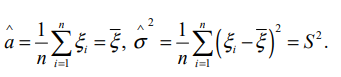

P.S. Явная формула метода моментов и метода максимального правдоподобия для вычисления оценки мат ожидания логнормальной с.в. https://publications.hse.ru/pubs/share/direct/776603038.pdf - с. 31, 35
Вычисление дисперсии: http://www.machinelearning.ru/wiki/images/7/74/2017_617_KozlovVD.pdf - с. 10, 11

Связь дисперсии и мат ожидания нормального распределения соответствующего логарифму от duration (выборки логнормального распределения):
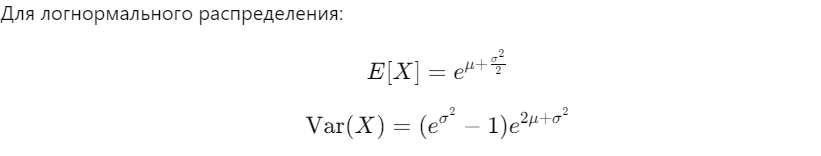



In [ ]:
dur_loc = duration
normaldur = np.log(duration)

# Метод моментов (ММ)
mu_mm = np.mean(normaldur)
sigma2_mm = np.var(normaldur, ddof=0)  # Метод моментов использует деление на n

sigma_mm = np.std(normaldur, ddof=0)

# Вывод результатов.
print(f"Метод моментов и метод максимального правдоподобия для логарифмов значений (как логарифма от выборки, то есть гауссовской случайной величины) (оценки совпадают): \n(оценка мат ожидания) mu = {mu_mm:.2f}, (оценка дисперсии) sigma^2 = {sigma2_mm:.2f}")

# 2. Вычисляем параметры логнормального распределения
expected_value = np.exp(mu_mm + sigma2_mm / 2)  # Математическое ожидание
variance = (np.exp(sigma2_mm) - 1) * np.exp(2 * mu_mm + sigma2_mm)  # Дисперсия

print(f"Мат. ожидание исходного логнормального распределения: {expected_value:.4f}")
print(f"Дисперсия исходного логнормального распределения: {variance:.4f}")


Метод моментов и метод максимального правдоподобия для логарифмов значений (как логарифма от выборки, то есть гауссовской случайной величины) (оценки совпадают): 
(оценка мат ожидания) mu = 2.17, (оценка дисперсии) sigma^2 = 0.46
Мат. ожидание исходного логнормального распределения: 11.0599
Дисперсия исходного логнормального распределения: 71.4988


Вывод: В предположении что распределение duration является логнормальным (Точнее, логнормальным с параметрами sigma=0.92; loc = 2.2972, exp(mu) = 5.9191), эту гипотезу мы не можем отвергнуть с уровнем значимости 0.01, мы оценили вручную параметры этого логнормального распределения следующим образом: взяли логарифм от значений выборки, и оценили параметры полученного Нормального распределения (получились параметры mu = 2.17, sigma^2 = 0.46). Чтобы вернуться к параметрам логнормального распределения мы использовали формулы (в предыдущем блоке) и получили Мат. ожидание исходного логнормального распределения E(X) = 11.0599, Дисперсия исходного логнормального распределения D(X) = 71.4988.